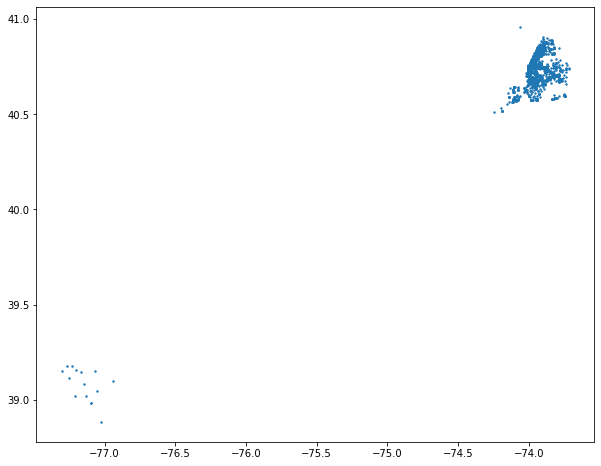

[[ 40.65831  -73.94406 ]
 [ 40.658    -73.94723 ]
 [ 40.658    -73.94723 ]
 ...
 [ 39.115805 -77.252898]
 [ 39.179332 -77.267914]
 [ 39.047816 -77.051924]]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

markers = ['ro', 'b*', 'g+', 'b*']

with open('wifi.pickle', 'rb') as f: 
    X = pickle.load(f)
      
plt.figure(figsize=(10, 8))
plt.scatter(X[:,1], X[:,0], s=2)
plt.show()

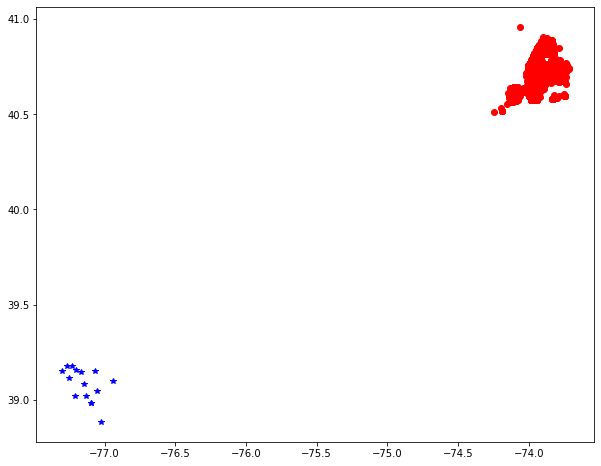

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

plt.figure(figsize=(10, 8))
for p, c in zip(X, kmeans.labels_):
    plt.plot(p[1:], p[:1], markers[c])
plt.show()

In [5]:
from sklearn.metrics import silhouette_score

print("Cluster centroids:", *kmeans.cluster_centers_)

# we can also predict a cluster now! Similar to kNN with 1-NN :)
print("Prediction:", *kmeans.predict([[39.5, -77], [41, -74.5]]))

labels = kmeans.labels_
print("SC =", silhouette_score(X, labels, metric='euclidean'))

Cluster centroids: [ 40.74210532 -73.94876684] [ 39.0809274 -77.1467036]
Prediction: 1 0
SC = 0.9696329902695793


In [5]:
## TODO repeat this for 
## 1) 3 clusters
## 2) for DBScan algorithm with different distance parameter. Will it change silhouette score?

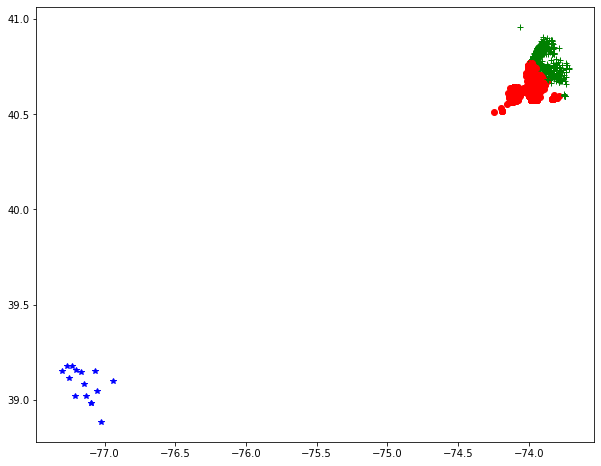

Cluster centroids: [ 40.70194597 -73.9832124 ] [ 39.0809274 -77.1467036] [ 40.78633649 -73.91082878]
Prediction: 1 0
SC = 0.37533058324340585


In [6]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

plt.figure(figsize=(10, 8))
for p, c in zip(X, kmeans.labels_):
    plt.plot(p[1:], p[:1], markers[c])
plt.show()

print("Cluster centroids:", *kmeans.cluster_centers_)

# we can also predict a cluster now! Similar to kNN with 1-NN :)
print("Prediction:", *kmeans.predict([[39.5, -77], [41, -74.5], []]))

labels = kmeans.labels_
print("SC =", silhouette_score(X, labels, metric='euclidean'))

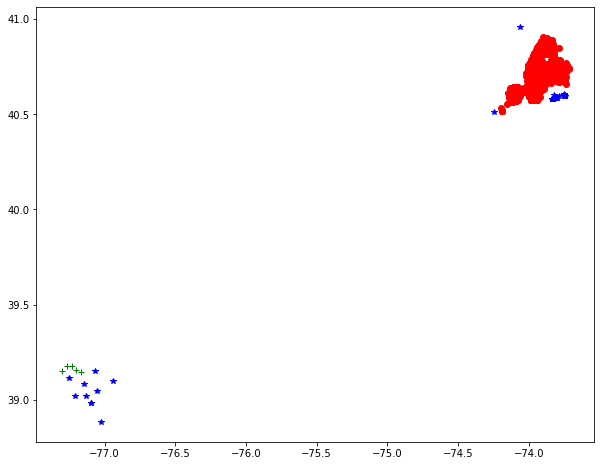

SC = 0.5095922900697226


In [14]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=3).fit(X)
plt.figure(figsize=(10, 8))
for p, c in zip(X, dbscan.labels_):
    plt.plot(p[1:], p[:1], markers[c])
plt.show()

#print("Cluster centroids:", *dbscan.cluster_centers_)

# we can also predict a cluster now! Similar to kNN with 1-NN :)
#print("Prediction:", *dbscan.predict([[39.5, -77], [41, -74.5]]))

labels = dbscan.labels_
print("SC =", silhouette_score(X, labels, metric='euclidean'))